<a href="https://colab.research.google.com/github/hyeonukim/DataProcessing_ImageHandling/blob/main/How_to_handle_Data%2C_and_Images(11)_OpenCV_Contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import files
uploaded = files.upload()

Saving chanel.jpg to chanel (1).jpg


## OpenCV Contours

Input image must be Gray Scaled beforehand

**cv2.findContours(image, mode, method)**: finding Contours from image
- mode: Contour retrieval mode
  - RETER_EXTERNAL: it returns only extreme outer flags.
  - RETER_LIST: It simply retrieves all the contours, but doesn't create any parent-child relationship.
  - RETER_TREE: It retrieves all the contours and creates a full family hierarchy list.
- method: Contour approximation method
  - CHAIN_APPROX_NONE: stores absolutely all the contour points. That is, any 2 subsequent points (x1,y1) and (x2,y2) of the contour will be either horizontal, vertical or diagonal neighbors, that is, max(abs(x1-x2),abs(y2-y1))==1.
  - CHAIN_APPROX_SIMPLE: compresses horizontal, vertical, and diagonal segments and leaves only their end points. For example, an up-right rectangular contour is encoded with 4 points.

**cv2.drawContours(image, contour_index, color, thickness)**: Draws contours outlines or filled contours.
- contour_index: Parameter indicating a contour to draw. (all contours: -1)


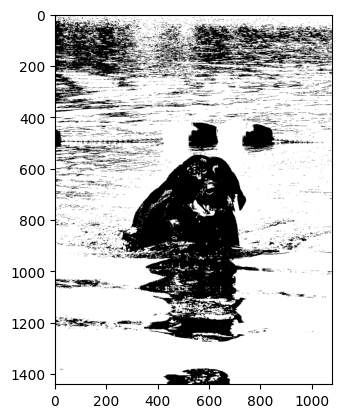

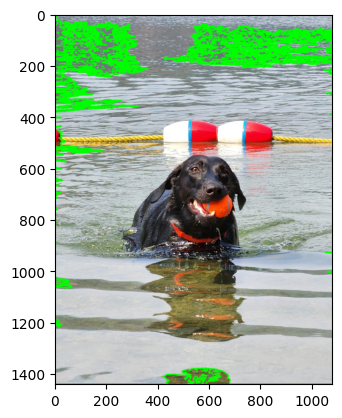

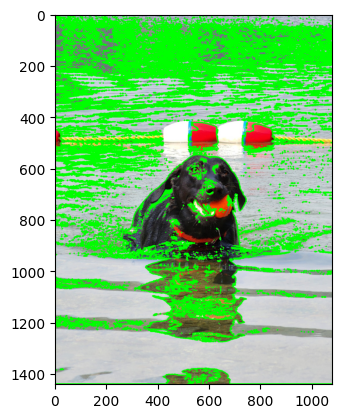

In [25]:
import cv2
import matplotlib.pyplot as plt

# image1 is for contours_external, image2 is for contours_tree
image1 = cv2.imread('chanel.jpg')
image2 = cv2.imread('chanel.jpg')

# gray scale the image
image_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
# thresholding
ret, thresh1 = cv2.threshold(image_gray, 127, 255, 0)
ret, thresh2 = cv2.threshold(image_gray, 127, 255, 0)

plt.imshow(cv2.cvtColor(thresh1, cv2.COLOR_GRAY2RGB))
plt.show()

# have to return index 0, because cv2.findContours returns (contours, hierarchy)
contours_external = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
contours_tree = cv2.findContours(thresh2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]

# show all contours of the image (we can select by adjusting the value '-1' to 0 to n)
external_image = cv2.drawContours(image1, contours_external, -1, (0, 255, 0), 4)
tree_image = cv2.drawContours(image2, contours_tree, -1, (0, 255, 0), 4)

plt.imshow(cv2.cvtColor(external_image, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(tree_image, cv2.COLOR_BGR2RGB))
plt.show()